# CRIME PREDICTION USING MACHINE LEARNING

The project "Crime Prediction Using Machine Learning" aims to predict future crimes based on historical data using advanced machine learning algorithms. By analyzing features such as time, location, and crime type, the system identifies patterns and forecasts potential incidents. Various models, including Decision Tree, Random Forest, Gradient Boosting, and Deep Neural Networks, were evaluated, with Random Forest achieving the highest accuracy. Time-series models like ARIMA and Prophet were also applied to predict crime trends. The results enable law enforcement to allocate resources efficiently, improve public safety, and implement proactive crime prevention strategies.

# 1. READ FILE

In [1]:
import pandas as pd

path = '/kaggle/input/crime-data-from-2020-to-present/Crime_Data_from_2020_to_Present.csv'

df = pd.read_csv(path,low_memory=False)

print(df.head())
print(df.info())

       DR_NO               Date Rptd                DATE OCC  TIME OCC  AREA  \
0  190326475  03/01/2020 12:00:00 AM  03/01/2020 12:00:00 AM      2130     7   
1  200106753  02/09/2020 12:00:00 AM  02/08/2020 12:00:00 AM      1800     1   
2  200320258  11/11/2020 12:00:00 AM  11/04/2020 12:00:00 AM      1700     3   
3  200907217  05/10/2023 12:00:00 AM  03/10/2020 12:00:00 AM      2037     9   
4  220614831  08/18/2022 12:00:00 AM  08/17/2020 12:00:00 AM      1200     6   

   AREA NAME  Rpt Dist No  Part 1-2  Crm Cd  \
0   Wilshire          784         1     510   
1    Central          182         1     330   
2  Southwest          356         1     480   
3   Van Nuys          964         1     343   
4  Hollywood          666         2     354   

                                Crm Cd Desc  ... Status   Status Desc  \
0                          VEHICLE - STOLEN  ...     AA  Adult Arrest   
1                     BURGLARY FROM VEHICLE  ...     IC   Invest Cont   
2                

In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 978628 entries, 0 to 978627
Data columns (total 28 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   DR_NO           978628 non-null  int64  
 1   Date Rptd       978628 non-null  object 
 2   DATE OCC        978628 non-null  object 
 3   TIME OCC        978628 non-null  int64  
 4   AREA            978628 non-null  int64  
 5   AREA NAME       978628 non-null  object 
 6   Rpt Dist No     978628 non-null  int64  
 7   Part 1-2        978628 non-null  int64  
 8   Crm Cd          978628 non-null  int64  
 9   Crm Cd Desc     978628 non-null  object 
 10  Mocodes         834648 non-null  object 
 11  Vict Age        978628 non-null  int64  
 12  Vict Sex        841430 non-null  object 
 13  Vict Descent    841419 non-null  object 
 14  Premis Cd       978613 non-null  float64
 15  Premis Desc     978043 non-null  object 
 16  Weapon Used Cd  325959 non-null  float64
 17  Weapon Des

# 2. DATA PREPROCESSING

In [3]:
if df.duplicated().any():
    df = df.drop_duplicates()
    print("Duplicate records removed.")
else:
    print("Data has no duplicate records.")

Data has no duplicate records.


In [4]:
import pandas as pd
import numpy as np

columns_to_process = ['Premis Desc', 'Status', 'Status Desc', 'Part 1-2', 
                      'Weapon Used Cd', 'Vict Age', 'Vict Descent', 
                      'Vict Sex', 'Premis Cd', 'LOCATION']

for col in columns_to_process:
    if df[col].dtype == 'float64' or df[col].dtype == 'int64': 
        df[col] = df[col].fillna(-1)
    elif df[col].dtype == 'object':  
        df[col] = df[col].fillna('Unknown')

print(df[columns_to_process].isnull().sum())

Premis Desc       0
Status            0
Status Desc       0
Part 1-2          0
Weapon Used Cd    0
Vict Age          0
Vict Descent      0
Vict Sex          0
Premis Cd         0
LOCATION          0
dtype: int64


In [5]:
crime_counts = df['Crm Cd'].value_counts()
top_10_crimes = crime_counts.nlargest(5).index
df = df[df['Crm Cd'].isin(top_10_crimes)]

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
features = ['Premis Desc', 'Status', 'Status Desc', 'Part 1-2', 'Weapon Used Cd', 'Vict Age', 'Vict Descent', 'Vict Sex', 'Premis Cd', 'LOCATION']
target = 'Crm Cd'

df_selected = df[[target] + features]

In [8]:
df_selected = df_selected.dropna()

In [9]:
df_selected.info()

<class 'pandas.core.frame.DataFrame'>
Index: 365590 entries, 0 to 978627
Data columns (total 11 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Crm Cd          365590 non-null  int64  
 1   Premis Desc     365590 non-null  object 
 2   Status          365590 non-null  object 
 3   Status Desc     365590 non-null  object 
 4   Part 1-2        365590 non-null  int64  
 5   Weapon Used Cd  365590 non-null  float64
 6   Vict Age        365590 non-null  int64  
 7   Vict Descent    365590 non-null  object 
 8   Vict Sex        365590 non-null  object 
 9   Premis Cd       365590 non-null  float64
 10  LOCATION        365590 non-null  object 
dtypes: float64(2), int64(3), object(6)
memory usage: 33.5+ MB


# 3. BUILDING MACHINE LEARNING MODELS

In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score,confusion_matrix


numerical_columns = ['Vict Age','Part 1-2','Weapon Used Cd', 'Premis Cd']

scaler = MinMaxScaler()

df_selected[numerical_columns] = scaler.fit_transform(df_selected[numerical_columns])


label_encoders = {}
for column in ['Vict Sex', 'LOCATION','Vict Descent','Premis Desc','Status', 'Status Desc']:
    le = LabelEncoder()
    df_selected[column] = le.fit_transform(df_selected[column])
    label_encoders[column] = le

X = df_selected[features]
y = df_selected[target]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import VotingClassifier

## 3.1. Initialize models

In [12]:

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)
logistic_regression = LogisticRegression(random_state=42, max_iter=5000)

models = {
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=5000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Voting Classifier" : VotingClassifier(estimators=[('rf', random_forest),
                                                        ('gb', gradient_boosting),
                                                        ('lr', logistic_regression)
                                                    ], voting='soft')}


accuracy_scores = {}

## 3.2. Result


Model: Decision Tree
Accuracy:  0.9353100467737082
              precision    recall  f1-score   support

         330       0.99      0.99      0.99     12262
         354       0.85      0.85      0.85     12125
         510       0.99      1.00      1.00     21936
         624       0.97      0.97      0.97     14894
         740       0.81      0.82      0.81     11901

    accuracy                           0.94     73118
   macro avg       0.92      0.92      0.92     73118
weighted avg       0.94      0.94      0.94     73118

Confusion Matrix:
 [[12152     0   110     0     0]
 [    0 10249     0     4  1872]
 [   91     0 21845     0     0]
 [    0     3     0 14430   461]
 [    0  1784     0   405  9712]]


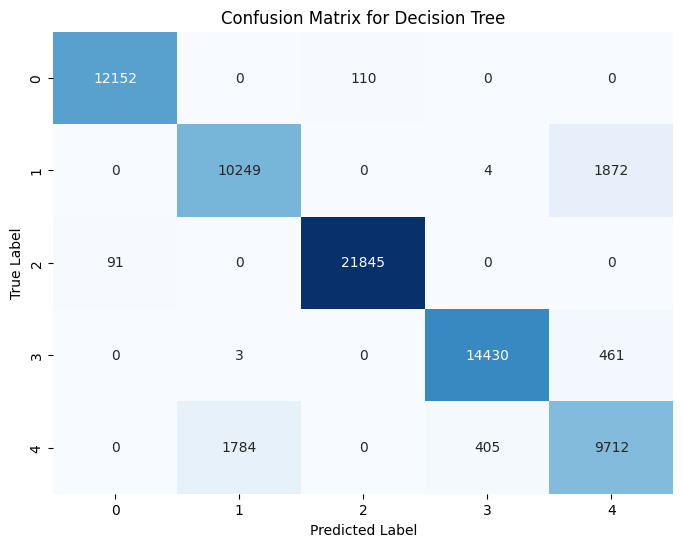


Model: Random Forest
Accuracy:  0.9523373177603326
              precision    recall  f1-score   support

         330       0.99      1.00      0.99     12262
         354       0.87      0.90      0.89     12125
         510       1.00      1.00      1.00     21936
         624       0.97      0.99      0.98     14894
         740       0.88      0.83      0.86     11901

    accuracy                           0.95     73118
   macro avg       0.94      0.94      0.94     73118
weighted avg       0.95      0.95      0.95     73118

Confusion Matrix:
 [[12229     0    33     0     0]
 [    0 10887     0     4  1234]
 [   91     0 21845     0     0]
 [    0     1     0 14753   140]
 [    0  1563     0   419  9919]]


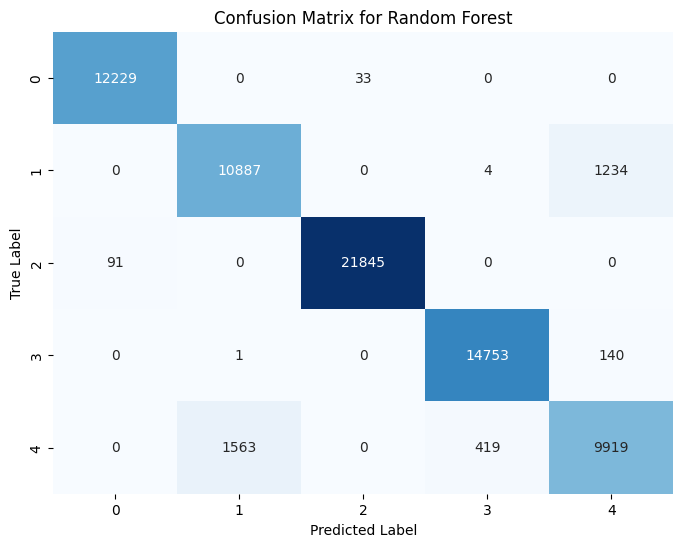


Model: Gradient Boosting
Accuracy:  0.9579720451872316
              precision    recall  f1-score   support

         330       0.99      1.00      1.00     12262
         354       0.88      0.93      0.90     12125
         510       1.00      1.00      1.00     21936
         624       0.97      0.99      0.98     14894
         740       0.91      0.83      0.87     11901

    accuracy                           0.96     73118
   macro avg       0.95      0.95      0.95     73118
weighted avg       0.96      0.96      0.96     73118

Confusion Matrix:
 [[12251     0    11     0     0]
 [    0 11253     0     5   867]
 [   89     0 21847     0     0]
 [    0     0     0 14785   109]
 [    0  1534     0   458  9909]]


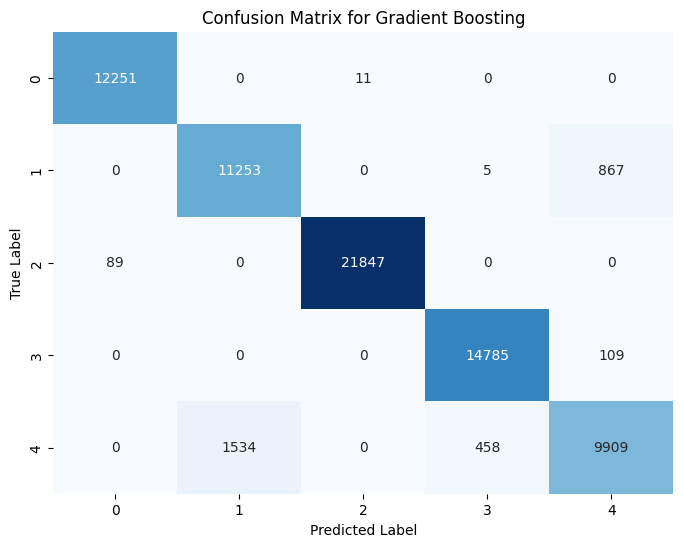


Model: Logistic Regression
Accuracy:  0.7878634535955579
              precision    recall  f1-score   support

         330       0.99      0.83      0.90     12262
         354       0.56      0.69      0.61     12125
         510       0.86      1.00      0.92     21936
         624       0.88      0.83      0.85     14894
         740       0.58      0.41      0.48     11901

    accuracy                           0.79     73118
   macro avg       0.77      0.75      0.76     73118
weighted avg       0.79      0.79      0.78     73118

Confusion Matrix:
 [[10207   789  1109    78    79]
 [    0  8306   191   179  3449]
 [   91     3 21830     2    10]
 [    0  2399    97 12364    34]
 [    1  3452  2111  1437  4900]]


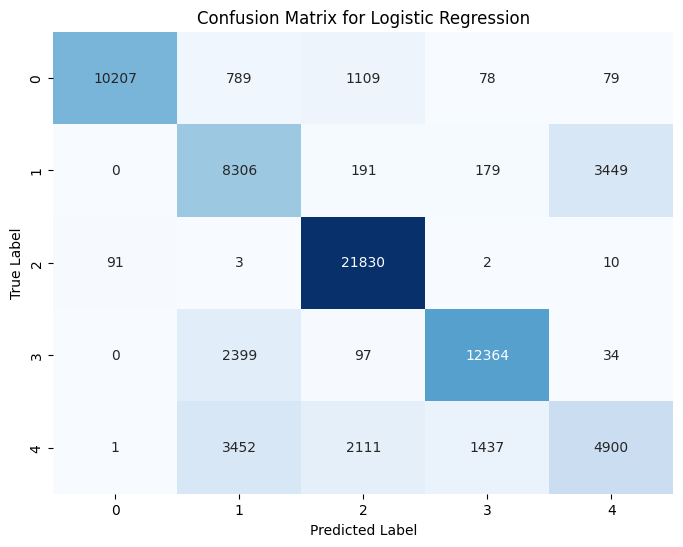


Model: K-Nearest Neighbors
Accuracy:  0.6550917694685303
              precision    recall  f1-score   support

         330       0.54      0.54      0.54     12262
         354       0.56      0.69      0.62     12125
         510       0.79      0.93      0.86     21936
         624       0.58      0.50      0.54     14894
         740       0.68      0.42      0.52     11901

    accuracy                           0.66     73118
   macro avg       0.63      0.62      0.62     73118
weighted avg       0.65      0.66      0.64     73118

Confusion Matrix:
 [[ 6609   785  2817  1325   726]
 [  740  8351   324  2139   571]
 [  991   177 20433   162   173]
 [ 2021  3664   845  7493   871]
 [ 1818  1878  1360  1832  5013]]


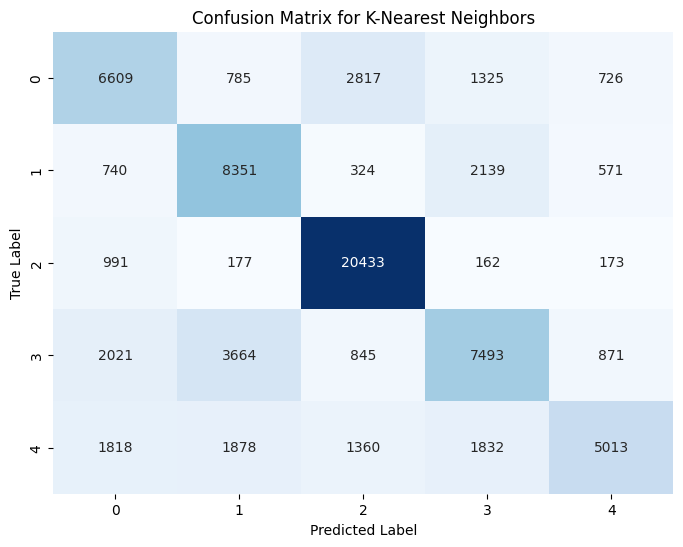


Model: Naive Bayes
Accuracy:  0.8279356656363686
              precision    recall  f1-score   support

         330       0.99      0.98      0.98     12262
         354       0.54      0.97      0.69     12125
         510       1.00      0.99      0.99     21936
         624       0.89      0.81      0.85     14894
         740       0.82      0.26      0.39     11901

    accuracy                           0.83     73118
   macro avg       0.85      0.80      0.78     73118
weighted avg       0.87      0.83      0.81     73118

Confusion Matrix:
 [[11988     0    34   137   103]
 [    0 11748     4   101   272]
 [  154     0 21639    16   127]
 [    0  2642     3 12093   156]
 [    0  7556     4  1272  3069]]


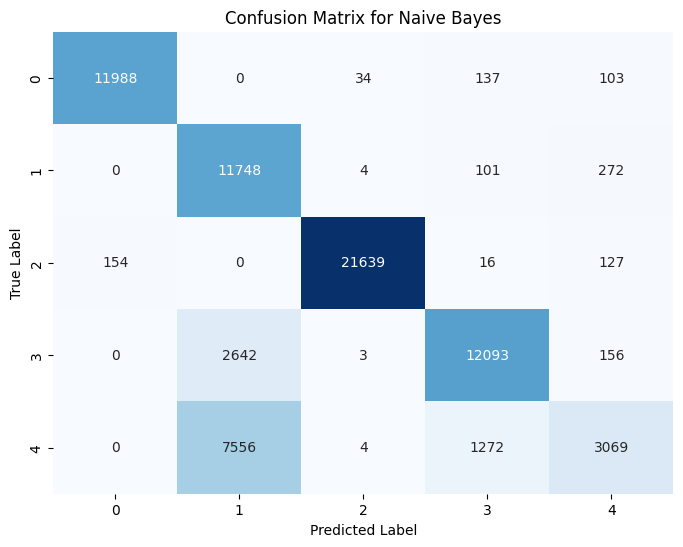


Model: Voting Classifier
Accuracy:  0.956713805082196
              precision    recall  f1-score   support

         330       0.99      1.00      0.99     12262
         354       0.87      0.93      0.90     12125
         510       1.00      1.00      1.00     21936
         624       0.97      0.99      0.98     14894
         740       0.92      0.82      0.87     11901

    accuracy                           0.96     73118
   macro avg       0.95      0.95      0.95     73118
weighted avg       0.96      0.96      0.96     73118

Confusion Matrix:
 [[12226     0    36     0     0]
 [    0 11308     0     5   812]
 [   87     0 21849     0     0]
 [    0     1     0 14803    90]
 [    0  1652     0   482  9767]]


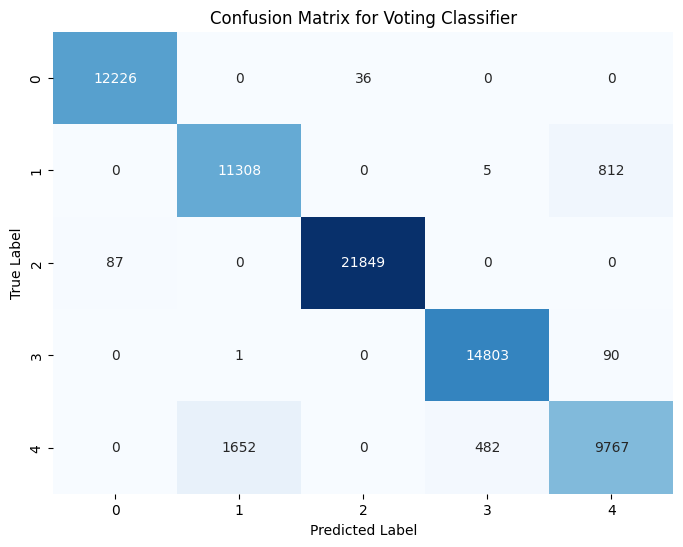

In [13]:
for model_name, model in models.items():
    model.fit(X_train, y_train)
    
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    accuracy_scores[model_name] = accuracy

    print(f"\nModel: {model_name}")
    print("Accuracy: ", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

    plt.figure(figsize=(8, 6))
    sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(f'Confusion Matrix for {model_name}')
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.show()

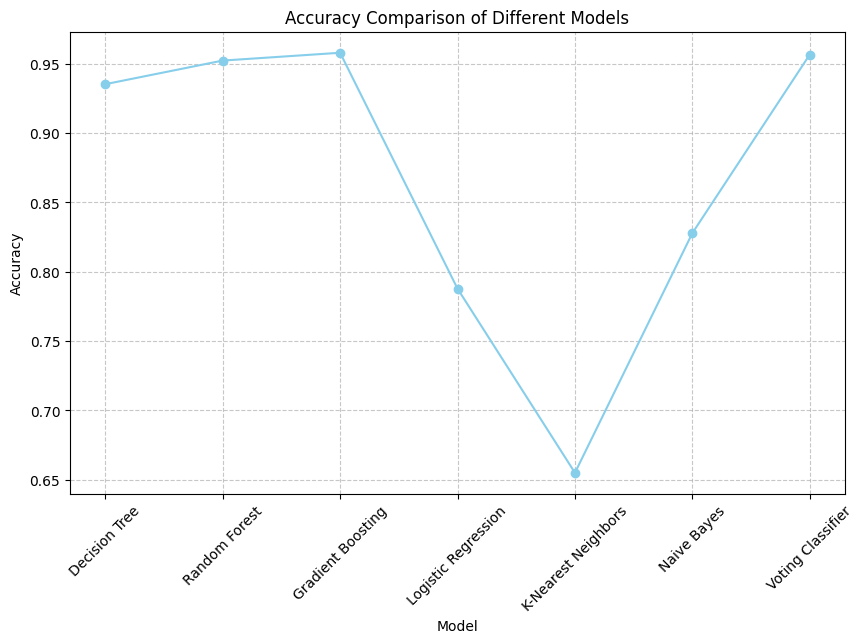

In [14]:
plt.figure(figsize=(10, 6))
plt.plot(list(accuracy_scores.keys()), list(accuracy_scores.values()), marker='o', linestyle='-', color='skyblue')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.title('Accuracy Comparison of Different Models')
plt.xticks(rotation=45)
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.show()